# **Travel Package Purchase Prediction**

# Context

 "Visit with us" is tourism company. The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps us to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

# Objective



1. Analyze  customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. 
2. The model will be built to make predictions before a customer is contacted.



## Data Dictionary 

1. CustomerID:Unique customer ID
2. ProdTaken:Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age:Age of customer
4. TypeofContact:How customer was contacted (Company Invited or Self Inquiry)
5. CityTier:City tier depends on the development of a city, population,       facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch:Duration of the pitch by a salesperson to the customer
7. Occupation:Occupation of customer
8. Gender:Gender of customer
9. NumberOfPersonVisiting:Total number of persons planning to take the trip with the customer
10. NumberOfFollowups:Total number of follow-ups has been done by sales person after sales pitch
11. ProductPitched:Product pitched by the salesperson
12. PreferredPropertyStar:Preferred hotel property rating by customer
13. MaritalStatus:Marital status of customer
14. NumberOfTrips:Average number of trips in a year by customer
15. Passport:The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore: Sales pitch satisfaction score
17. OwnCar:Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting:Total number of children with age less than 5 planning to take the trip with the customer
19. Designation:Designation of the customer in the current organization
20. MonthlyIncome:Gross monthly income of the customer




# Import Required Libraries 



In [428]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer)


## For missing value Imputation
from sklearn.impute import SimpleImputer


# Establish connection to Google Drive

In [ ]:
from google.colab import  drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Tourism=pd.read_excel('/content/drive/MyDrive/Tourism.xlsx' ,sheet_name='Tourism')


In [ ]:
## Creating a Copy 
data=Tourism.copy()

# Basic Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,NaN,NaN,NaN,202443.5,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


 Looking at statistical summary , we can see that for couple of columns data is missing and following columns contains categorical data 
 

1.   TypeofContact
2.   Occupation
3.   Gender
4.   ProductPitched
5. MaritalStatus
6. Designation 
 
We can convert these columns  to categorical variables post we treat missing values and outliers .Also gor Gender we could see three unique values instead of two so we will have to review this data for any typos .

In [ ]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

We could see we have null/missing  values  in  following 8 column and we will see whether we need to treat them or leave them as is post further analysis .
 
1. Age 
2. Type of Contract 
3. Duration of Pitch
4. Number of Followup
5. PreferredPropertyStar
6. NumberOfTrips 
7. NumberOfChildrenVisiting
8. MonthlyIncome


In [ ]:
## Customer IS is uniqie and it is like serial Number  so let us drop it 

data=data.drop('CustomerID',axis=1)

# Missing Value Treatment

We are going to use ensemble model which takes  care of missing data . Still we will try to see if we can fill Missing Values . 

## Treating TypeOfContract

In [ ]:
data.groupby(['TypeofContact'] ,dropna=False, as_index=False).size()

,TypeofContact,size
0,Company Invited,1419
1,Self Enquiry,3444
2,NaN,25


We can see that maximum Type of Contract as Self Enquiry so we can replace 25 missing values with TypeofContact as Self Enquiry .

In [ ]:
data['TypeofContact'].fillna(value='Self Enquiry',inplace=True)

In [ ]:
data.groupby(['TypeofContact'] ,dropna=False, as_index=False).size()

,TypeofContact,size
0,Company Invited,1419
1,Self Enquiry,3469


##  Treating Gender as it contains some wrong  data 

We can see that 233 rows have Nan data . From  statistical summary we can see that for Monthly income we have mean as 23619.85 and median values as 22347.0 . Which means data is bit right skewed . We can replace missing values with median value .

In [ ]:
data.groupby(['Gender'],dropna=False,as_index=False).size()

,Gender,size
0,Fe Male,155
1,Female,1817
2,Male,2916


These are some 155 records with wrong spelling for Fe Male . Let us correct it .

In [ ]:
data['Gender']=data['Gender'].replace('Fe Male','Female')

In [ ]:
data.groupby(['Gender'],dropna=False,as_index=False).size()

,Gender,size
0,Female,1972
1,Male,2916


# Treating Missing Values For Numerical Columns 


1. Age
2. Duration of Pitch
3. Number of Followup
4. PreferredPropertyStar
5. NumberOfTrips
6. NumberOfChildrenVisiting
7. MonthlyIncome


In [ ]:
## List of Numberical Columns with Missing Data 

NumericalColumns=['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']


## Checking  Age Column

In [ ]:
data['Age'].value_counts(dropna=False)

35.0    237
36.0    231
NaN     226
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
49.0     65
48.0     65
55.0     64
54.0     61
56.0     58
24.0     56
23.0     46
22.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

Let us find how many columns have outlier s

Based on Statistical summary ,For Age Mean and Median  values are almost same so we can replace Missing Age values with Median .

## Checking Monthly Income Column

In [ ]:
data['MonthlyIncome'].value_counts(dropna=False)

NaN        233
20855.0      7
21020.0      7
21288.0      7
17342.0      7
          ... 
17074.0      1
24250.0      1
21077.0      1
24714.0      1
21471.0      1
Name: MonthlyIncome, Length: 2476, dtype: int64

## Checking Durationof Pitch 

In [ ]:
data['DurationOfPitch'].value_counts(dropna=False)

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
NaN      251
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64

For Duration of Pitch  we have 251 missing values and  Mean is bit Higher than Median . Let us replace missing Duration of Pitch by median .

## CheckingNumberOfTrips

In [ ]:
data['NumberOfTrips'].value_counts(dropna=False)

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
NaN      140
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

 Number of Trips we have 140 missing values and mean and mode are also same so we can replace missing values with median.

## Checking NumberofChildren , Prefered ProertyStar and Number of Follow Ups

In [ ]:
data['NumberOfChildrenVisiting'].value_counts(dropna=False)

1.0    2080
2.0    1335
0.0    1082
3.0     325
NaN      66
Name: NumberOfChildrenVisiting, dtype: int64

We have 66 missing values for Number of Childrenvisiting

In [ ]:
data['PreferredPropertyStar'].value_counts(dropna=False)


3.0    2993
5.0     956
4.0     913
NaN      26
Name: PreferredPropertyStar, dtype: int64

We have 26 missing values for Prefered PropertyStar

In [ ]:
data['NumberOfFollowups'].value_counts(dropna=False)

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
NaN      45
Name: NumberOfFollowups, dtype: int64

We have 45 missing values for Number of Followups

# Missing Value Treatment for Numerical Columns  using common Function

In [ ]:
## Common Function to replace missing Values  with  median values for All numerican comumns 
def replace_missing_value(df, number_features ):

    imputer = SimpleImputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [ ]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
data[NumericalColumns]=replace_missing_value(data,NumericalColumns)

# Explotary Data Analysis 

# Univariate Analysis

In [409]:
# This Function will  use to  Plot Histplot and Box Plot for all numberical columns  . We will add Lines to show mean and Median 
# so we can check skewness of data . 
# we will pass data Frame and column name as variables 
def checkDistribution(dataframe,columnName):
     plt.figure(figsize=(12,7));
     plt.subplot(1,2,1)
     plt.title("Distribution for Variable "+ columnName, fontsize=15)
     sns.histplot(data=dataframe,x=columnName,kde=True ,bins=15)
     plt.axvline(np.mean(dataframe[columnName]), color='green', linestyle='--') # Add mean to the histogram
     plt.text(np.mean(dataframe[columnName])+0.15,30,'Mean = '+str(round(np.mean(dataframe[columnName]),1)),rotation=90, fontsize=12)
     plt.axvline(np.median(dataframe[columnName]), color='red', linestyle='-') # Add median to the histogram
     plt.text(np.median(dataframe[columnName])+0.15,30,'Median = '+str(round(np.median(dataframe[columnName]),1)),rotation=90, fontsize=12)
     # To plot Bolxplot and showing Mean value
     plt.subplot(1,2,2)
     plt.title("Boxplot for "+ columnName, fontsize=12)
     sns.boxplot(data=dataframe,x=columnName ,showmeans=True )

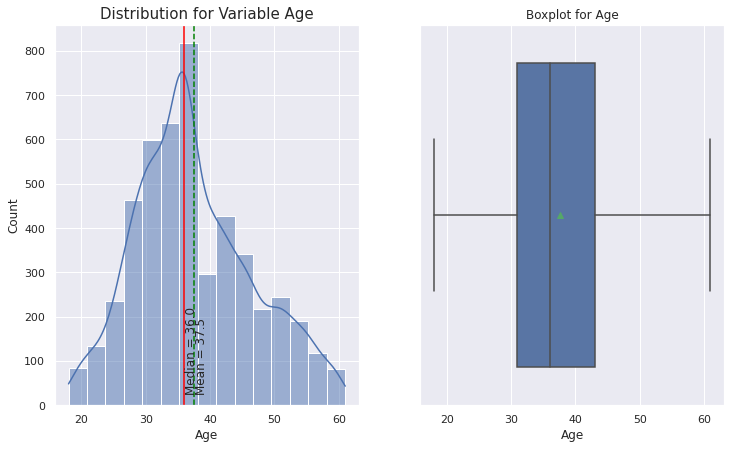

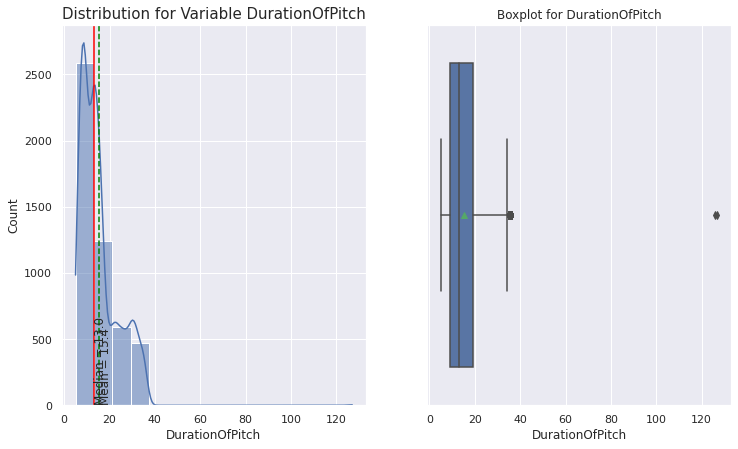

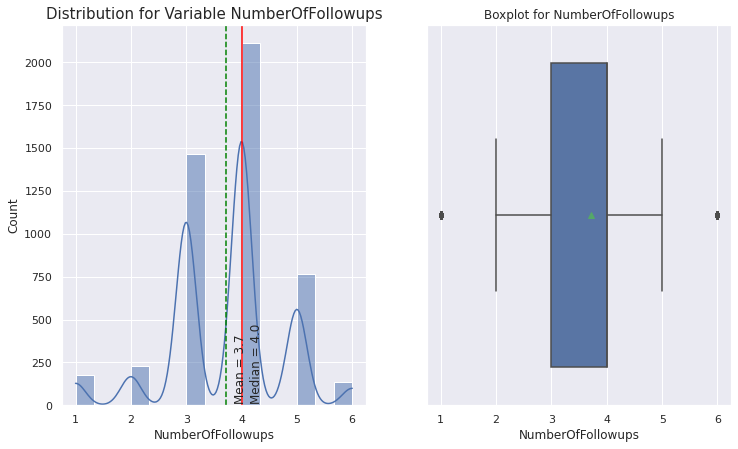

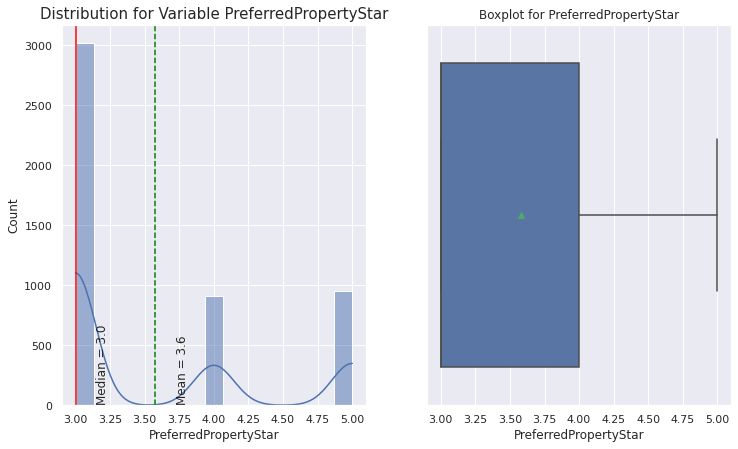

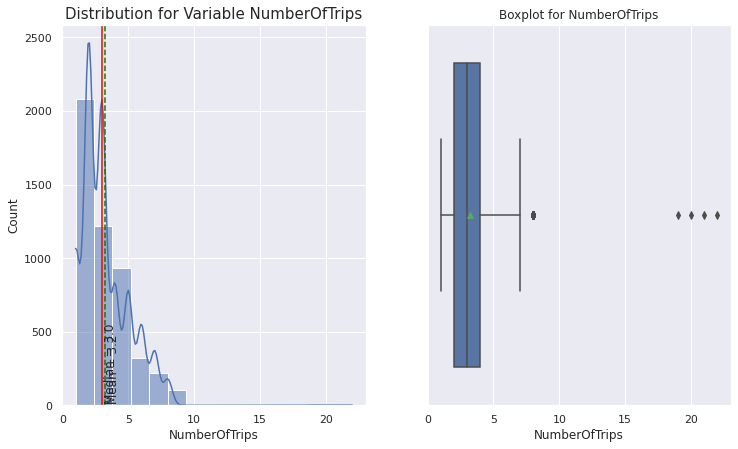

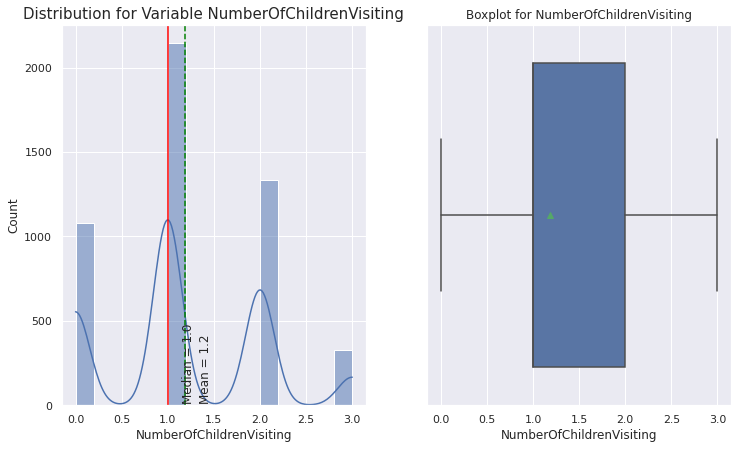

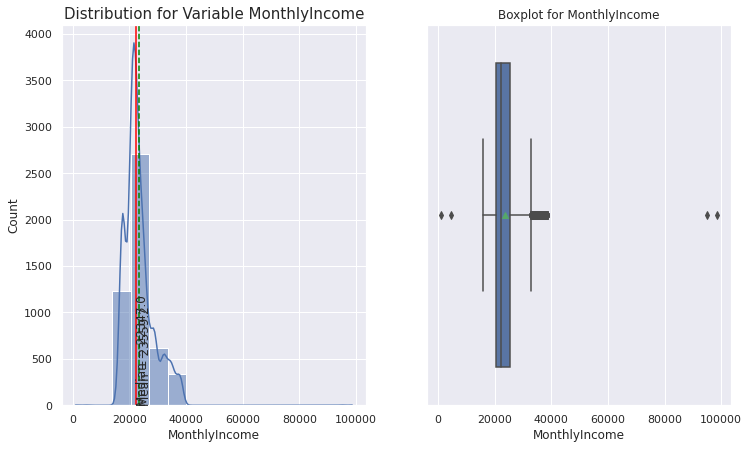

In [410]:
for i in NumericalColumns:
  checkDistribution(data,i)

In [ ]:
CatColumns=['TypeofContact',
'Occupation',
'Gender',
'ProductPitched',
'MaritalStatus',
'Designation']

# Bivariate Analysis

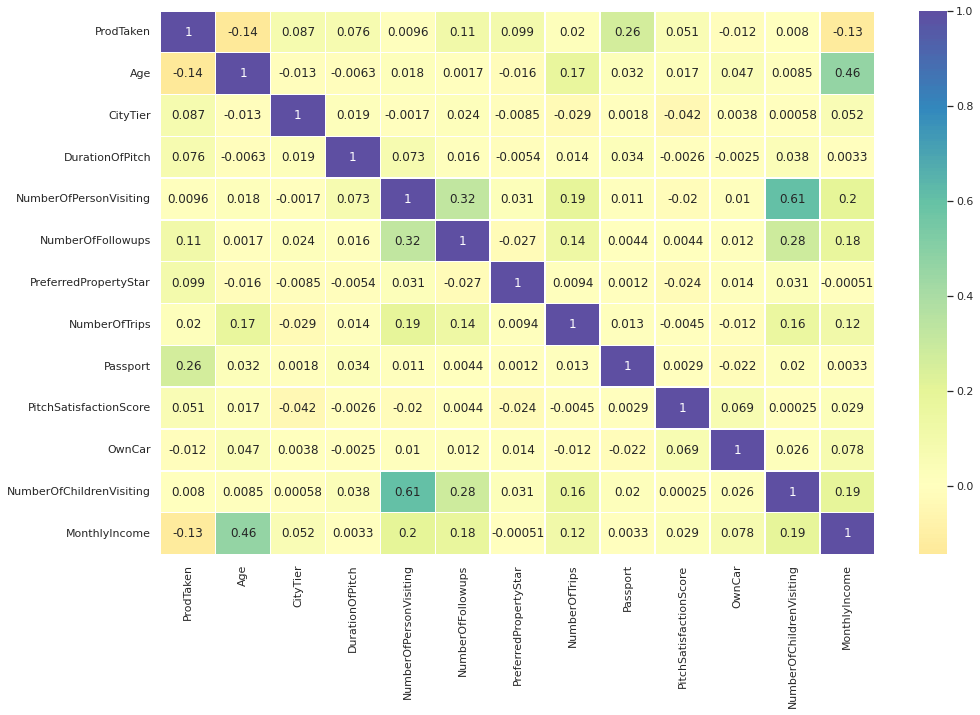

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="Spectral")
plt.show()

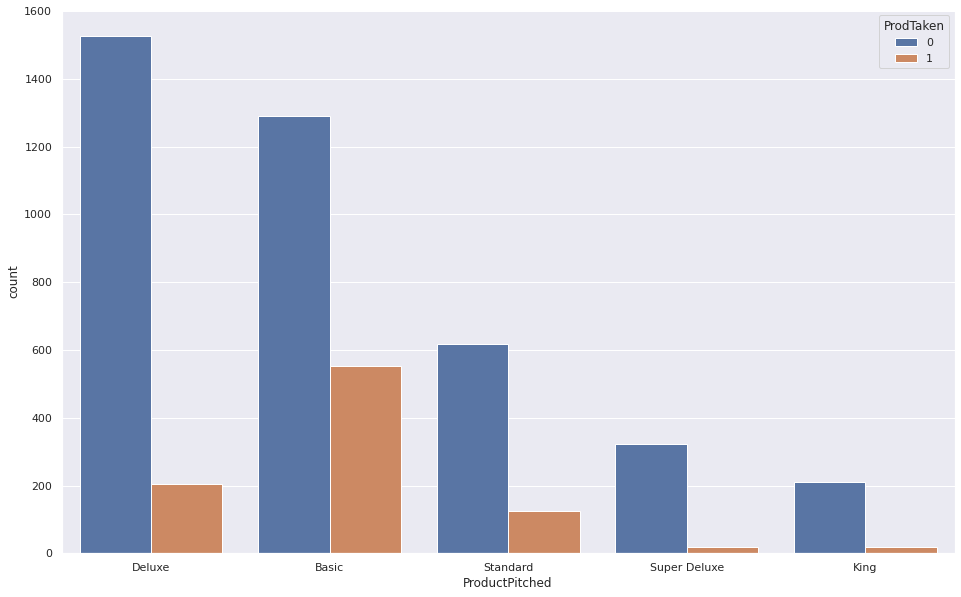

In [ ]:
sns.countplot(x="ProductPitched" , data=data,hue='ProdTaken',hue_order=None);


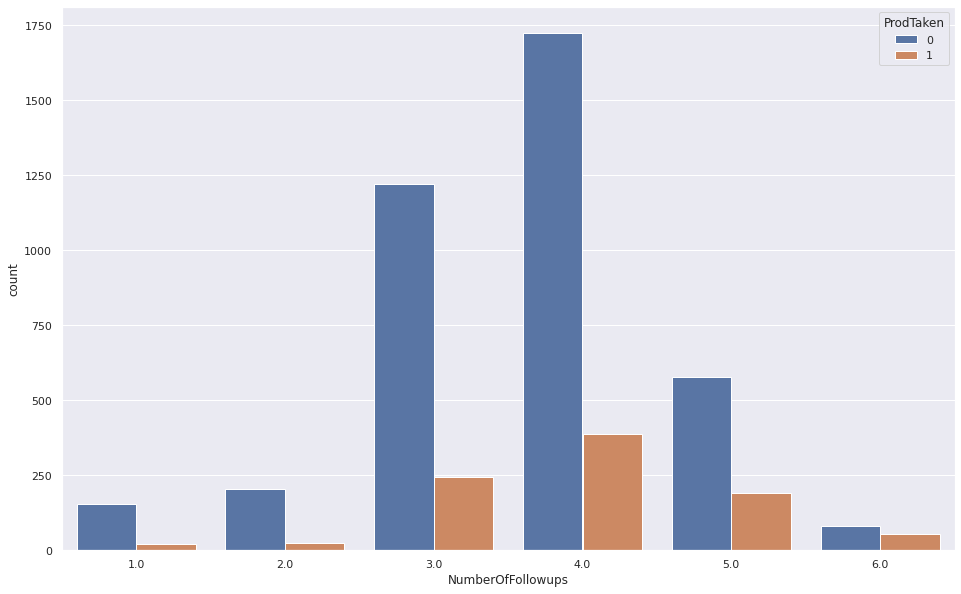

In [ ]:
sns.countplot(x="NumberOfFollowups" ,data=data,hue='ProdTaken',hue_order=None);

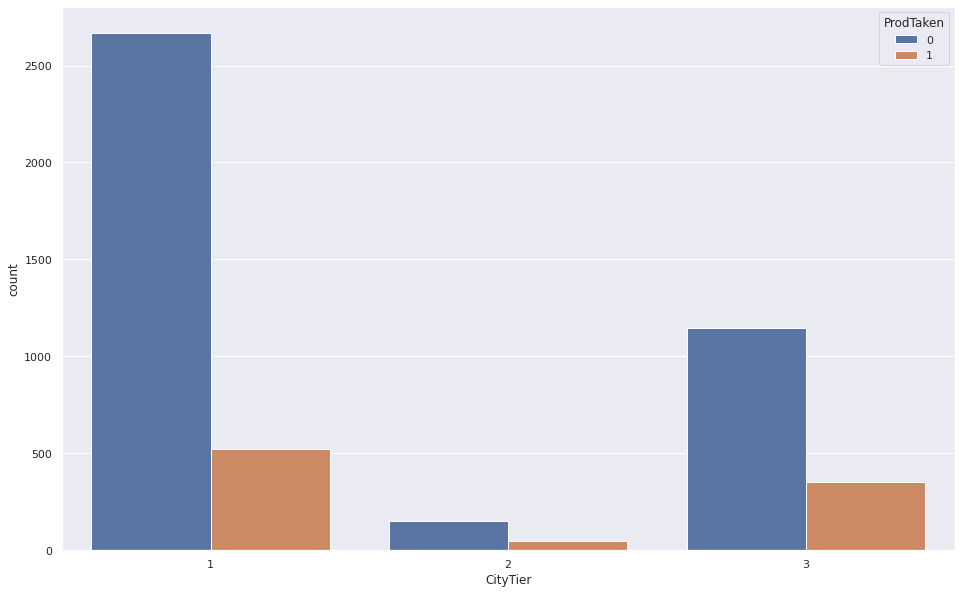

In [ ]:
sns.countplot(x="CityTier" ,data=data,hue='ProdTaken',hue_order=None);

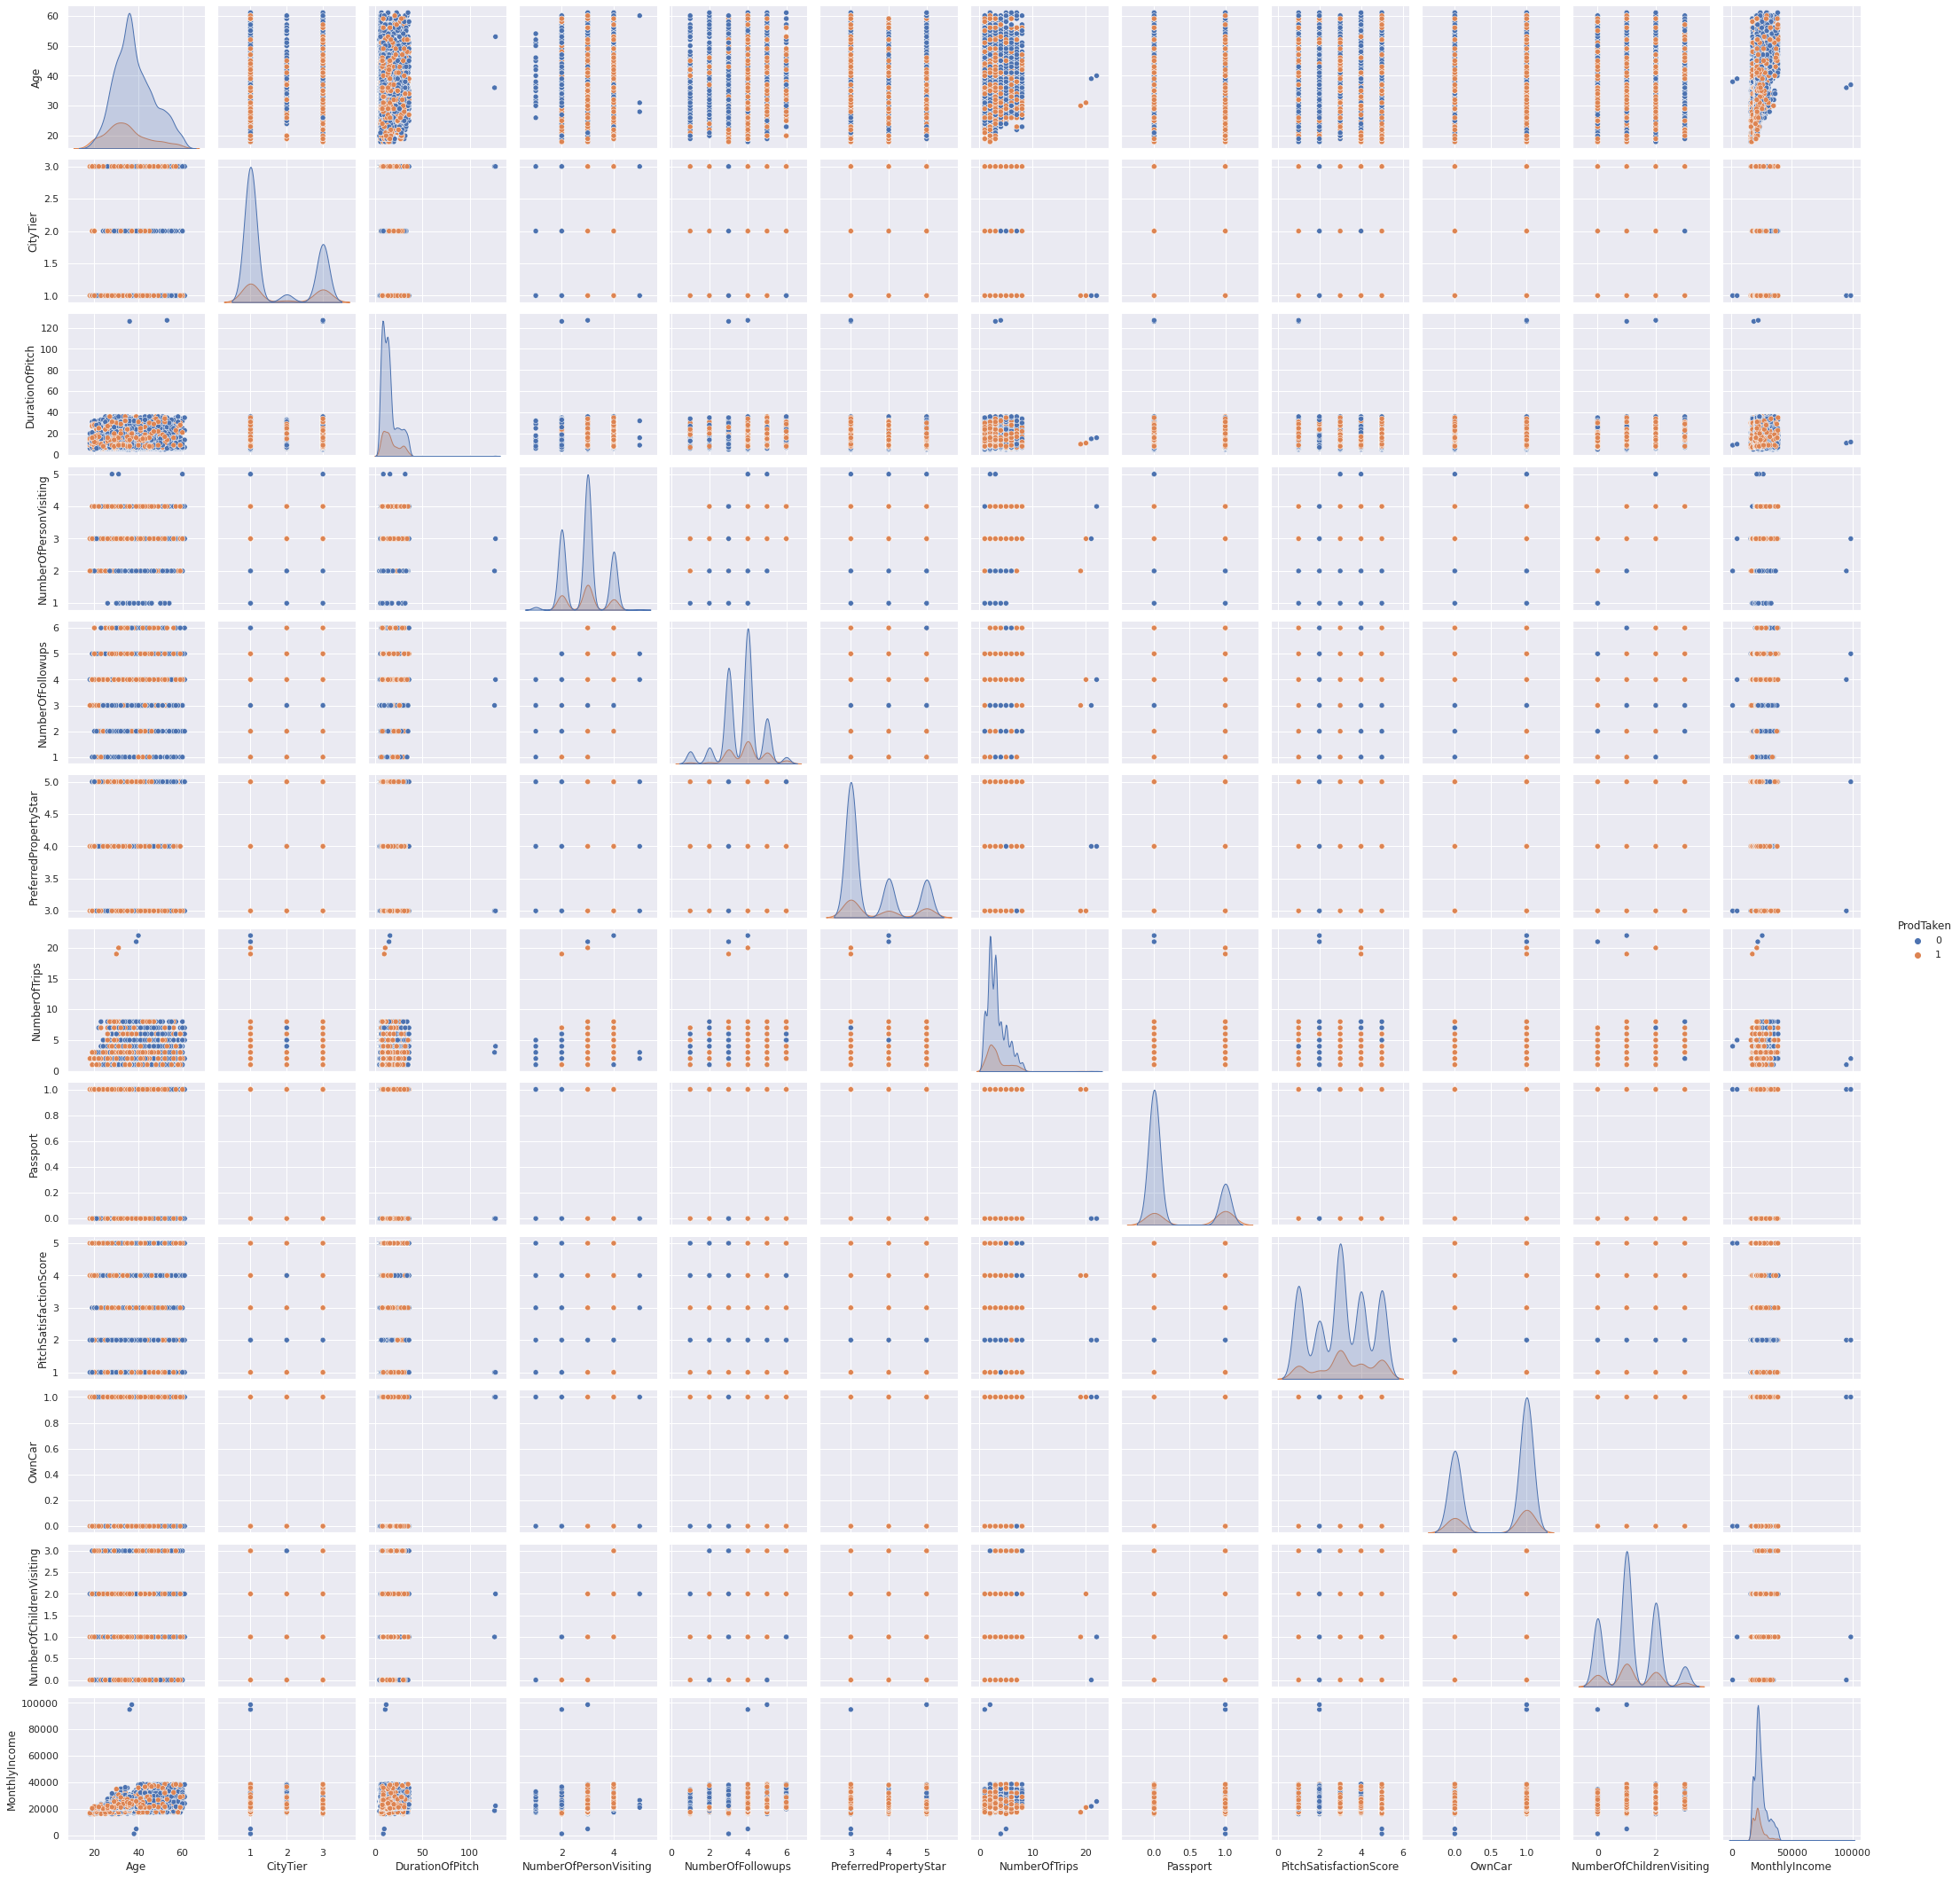

In [ ]:
sns.pairplot(data=data,hue="ProdTaken")
plt.show()



1.  Mostly of the people in this data set have Monthly income between 20000 to 40000 . Many people with Income 20000~30000 with Age range between 20 to 50  have taken Product .
2. People with income range 40000 are mostly between age range 30 to 60 and most people with 40000 income did not buy package if they are below 40 whereas people more than 40 and having income 40000 are buying this Product .
3. Most people buying  or not buying this  Product have done  upto 8  trip , with people buying this product have done mostly  0 to 5 trips. 


#  Data Preprocessing




# Let us find how many columns have outliers

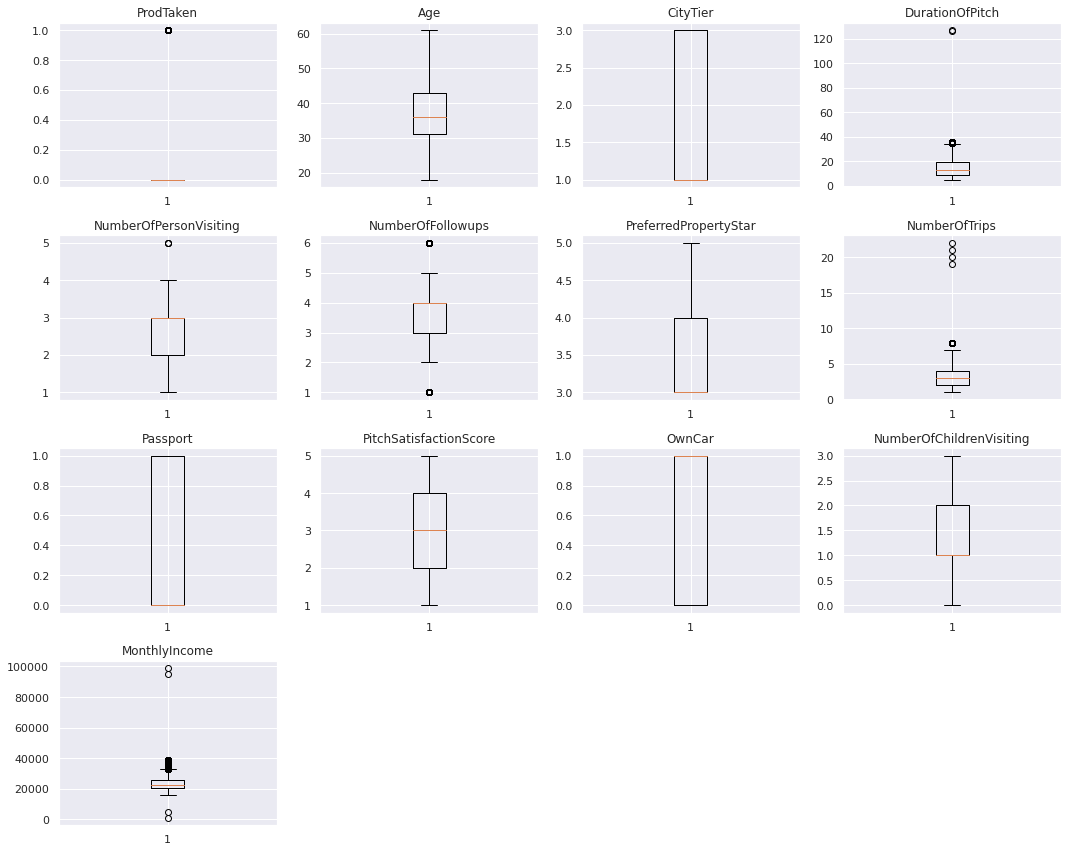

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR


Q1= data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

lowerQuartile= Q1-1.5*IQR
upperQuartile=Q3+1.5*IQR


In [ ]:
## Let us check  Percentage of outliers in  Numerical Columns 
(
    (data.select_dtypes(include=np.number) < lower)
    | (data.select_dtypes(include=np.number) > upper)
).sum() / len(data) * 100

ProdTaken                   18.821604
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.291326
NumberOfPersonVisiting       0.061375
NumberOfFollowups            6.382979
PreferredPropertyStar        0.000000
NumberOfTrips                2.229951
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.671849
dtype: float64

We can see that Product Taken is output variable so we will  not treat outliers for thus column  .Other columns i.e. Number of trips , Monthly Income , Number of Followup and Number of Person Visiting have some outliers . But  as one can say there can  be people with large salary than rest of the group  hence we will treat this outlier . Similarly people do travel in large or small groups hence  this column also does not need any treatment . Number  of followup and Number of trip also does not need outlier treatment as this  is person depedant charactristic and for some people  Duration of Pitch will be high whereas for some it will be low/mimum . 

# Data Preprocessing For Model Building

In [ ]:
datadup= data.copy()


In [ ]:
X=data.drop('ProdTaken',axis=1)
Y=data['ProdTaken']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4888 non-null   float64
 1   TypeofContact             4888 non-null   object 
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4888 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4888 non-null   float64
 8   ProductPitched            4888 non-null   object 
 9   PreferredPropertyStar     4888 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4888 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

In [ ]:
X=pd.get_dummies(X,columns=CatColumns ,drop_first=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          4888 non-null   float64
 1   CityTier                     4888 non-null   int64  
 2   DurationOfPitch              4888 non-null   float64
 3   NumberOfPersonVisiting       4888 non-null   int64  
 4   NumberOfFollowups            4888 non-null   float64
 5   PreferredPropertyStar        4888 non-null   float64
 6   NumberOfTrips                4888 non-null   float64
 7   Passport                     4888 non-null   int64  
 8   PitchSatisfactionScore       4888 non-null   int64  
 9   OwnCar                       4888 non-null   int64  
 10  NumberOfChildrenVisiting     4888 non-null   float64
 11  MonthlyIncome                4888 non-null   float64
 12  TypeofContact_Self Enquiry   4888 non-null   uint8  
 13  Occupation_Large B

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)


# Model Evaluation Criteria

## **What Can go Wrong **



1.  We can predict customers as they can potentially buy Package but in reality they will not .- ( Loss of Resource)
2.  We can predict customers as they will not  buy Package but in reality they could have . ( Loss of opportunity)



## What case is Important

1. For us we need to ensure that we  contact only those customers who have high chances to  buy Package  when we contact them  rather that lossing time on pursuing customers who have thin chances of buying any package .
2. Also we have to take into account that  we should not loose the customer /and their business by predicting that  will not buy any package but in reality they could have baought if we could have  contacted and pursured them to buy .
3. In this data set we have types of Packages given so while Proposing we need to ensure we pitch right Package to potential Customer but we don't have information whether as Delux  product was pitched and customer bought Basic package . So we have to  assume that Product Taken not taken is same as what Procut was pitched  during sales process .


## Which Metric To be Optimized 



1.   We need to find  cutomers who can buy products  before we contact them ,which means we need to predict TP note and FN less ( Recall  should be maximized).
2.  Also we need to ensure that we should not loss efforts in pursuiing a customer who has less chances of buying that product which means we should have miminum FP(  False Positive) rate as well . Which means we should check for good Precision rate as well ( Precision should also be good ).

3. Hence we would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting correct customer who would buy package.


## Common Functions

## Function to calculate Accurancy , recall , Precision , F1 score for any given Model.

In [ ]:
def model_Performance_Check(model,predictorvariables,target):
  predictions=model.predict(predictorvariables)
  acc = accuracy_score(target, predictions)
  recall=recall_score(target,predictions)
  f1 =f1_score(target,predictions)
  precision=precision_score(target,predictions)

  performance_matric=pd.DataFrame(
     { "Accurancy":acc,
      "Precision":precision,
      "Recall":recall,
      "F1":f1},index=[0],
  )

  
  return performance_matric


##  Function to plot Confusion Matrix

In [ ]:
def plot_confusion_matrix(model,predictorvariables,target):
   
   y_pred = model.predict(predictorvariables)
   cm = confusion_matrix(target, y_pred)
   labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
   plt.figure(figsize=(6, 4))
   sns.heatmap(cm, annot=labels, fmt="")
   plt.ylabel("True label")
   plt.xlabel("Predicted label")


# Decision Tree

In [ ]:
d_tree=DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
d_tree_train_performance=model_Performance_Check(d_tree,X_train,Y_train)

In [ ]:
d_tree_train_performance

,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


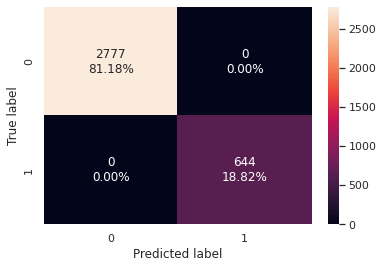

In [ ]:
plot_confusion_matrix(d_tree,X_train,Y_train)

In [ ]:
d_tree_test_performance=model_Performance_Check(d_tree,X_test,Y_test)

In [ ]:
d_tree_test_performance

,Accurancy,Precision,Recall,F1
0,0.877982,0.676364,0.673913,0.675136


We can clearly see that Model is overfitting and we can see comparatively very low Recall and Precision score for Test Model

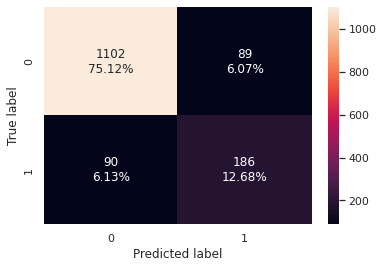

In [ ]:
plot_confusion_matrix(d_tree,X_test,Y_test)

# HyperParameter Tuing For Decision Tree with GridSearchCv

In [ ]:
from sklearn import metrics
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train,Y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, Y_train) 


DecisionTreeClassifier(random_state=1)

In [ ]:
tuned_d_tree_train_performance=model_Performance_Check(dtree_tuned,X_train,Y_train)

In [ ]:
tuned_d_tree_test_performance=model_Performance_Check(dtree_tuned,X_test,Y_test)

In [ ]:
tuned_d_tree_train_performance

,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


In [ ]:
tuned_d_tree_test_performance

,Accurancy,Precision,Recall,F1
0,0.877982,0.676364,0.673913,0.675136


#  Random Forest

In [ ]:
rm_random=RandomForestClassifier(random_state=1)

In [ ]:
rm_random.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rm_random_train_performance=model_Performance_Check(rm_random,X_train,Y_train)

In [ ]:
rm_random_train_performance

,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


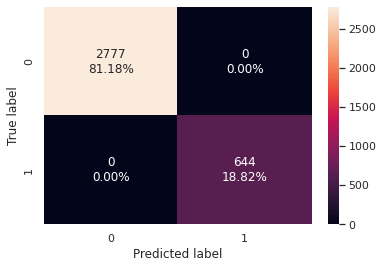

In [ ]:
plot_confusion_matrix(rm_random,X_train,Y_train)

In [ ]:
rm_random_test_performance=model_Performance_Check(rm_random,X_test,Y_test)

In [ ]:
rm_random_test_performance

,Accurancy,Precision,Recall,F1
0,0.916155,0.942197,0.59058,0.726058


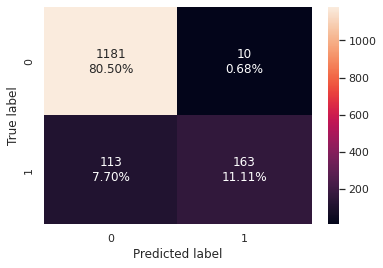

In [ ]:
plot_confusion_matrix(rm_random,X_test,Y_test)

#  Random Forest with Class Models

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [ ]:
rf_wt_train_model_performance=model_Performance_Check(rf_wt,X_train,Y_train)

In [ ]:
rf_wt_train_model_performance

,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


In [ ]:
rf_wt_test_model_performance=model_Performance_Check(rf_wt,X_test,Y_test)

In [ ]:
rf_wt_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.90593,0.948052,0.528986,0.67907


#  Hyper Parameter Tuning Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(max_features=None, n_estimators=110, random_state=1)

In [ ]:
rf_tuned_model_train_performance=model_Performance_Check(rf_tuned,X_train,Y_train)

In [ ]:
rf_tuned_model_train_performance

,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


In [ ]:
rf_tuned_model_test_performance=model_Performance_Check(rf_tuned,X_test,Y_test)

In [ ]:
rf_tuned_model_test_performance

,Accurancy,Precision,Recall,F1
0,0.929789,0.913876,0.692029,0.787629


# Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,Y_train)

BaggingClassifier(random_state=1)

In [ ]:
bagging_model_train_performance=model_Performance_Check(bagging,X_train,Y_train)

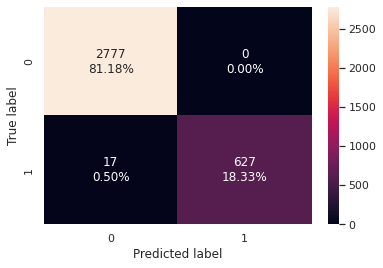

In [ ]:
plot_confusion_matrix(bagging,X_train,Y_train)

In [ ]:
bagging_test_mode_performance=model_Performance_Check(bagging,X_test,Y_test)

In [ ]:
bagging_test_mode_performance

,Accurancy,Precision,Recall,F1
0,0.91002,0.875,0.608696,0.717949


# Tuning Bagging Classifer

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, Y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
bagging_estimator_tuned_model_train_performance=model_Performance_Check(bagging_estimator_tuned,X_train,Y_train)

In [ ]:
bagging_estimator_tuned_model_train_performance


,Accurancy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


In [ ]:
bagging_estimator_tuned_model_test_performance=model_Performance_Check(bagging_estimator_tuned,X_test,Y_test)

In [ ]:
bagging_estimator_tuned_model_test_performance

,Accurancy,Precision,Recall,F1
0,0.918882,0.933702,0.612319,0.739606


# Boosting Classifiers

## AdaBost

In [ ]:
adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
adaboost_train_model_Performance=model_Performance_Check(adaboost,X_train,Y_train)

In [ ]:
adaboost_train_model_Performance

,Accurancy,Precision,Recall,F1
0,0.84449,0.687919,0.318323,0.435244


In [ ]:
adaboost_test_model_Performance=model_Performance_Check(adaboost,X_test,Y_test)

In [ ]:
adaboost_test_model_Performance

,Accurancy,Precision,Recall,F1
0,0.850034,0.725806,0.326087,0.45


## Tuning AdaBoost

In [ ]:
adabost_tuned=AdaBoostClassifier(random_state=1)
parameters={
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators":np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

scorer=metrics.make_scorer(metrics.f1_score)

grid_obj=GridSearchCV(adabost_tuned,parameters,scoring=scorer,cv=5)
grid_obj.fit(X_train,Y_train)

adabost_tuned=grid_obj.best_estimator_

adabost_tuned.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=90, random_state=1)

In [ ]:
adabost_tuned_train_model_performance=model_Performance_Check(adabost_tuned,X_train,Y_train)

In [ ]:
adabost_tuned_train_model_performance

,Accurancy,Precision,Recall,F1
0,0.977784,0.97651,0.903727,0.93871


In [ ]:
adabost_tuned_test_model_performance=model_Performance_Check(adabost_tuned,X_test,Y_test)

In [ ]:
adabost_tuned_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.888889,0.748899,0.615942,0.675944


# Gradient Boosting Classifier

In [ ]:
GbClassifier=GradientBoostingClassifier(random_state=1)
GbClassifier.fit(X_train,Y_train)
               

GradientBoostingClassifier(random_state=1)

In [ ]:
gClassifier_train_model_performance=model_Performance_Check(GbClassifier,X_train,Y_train)

In [ ]:
gClassifier_train_model_performance

,Accurancy,Precision,Recall,F1
0,0.883075,0.88125,0.437888,0.585062


In [ ]:
gClassifier_test_model_performance=model_Performance_Check(GbClassifier,X_test,Y_test)

In [ ]:
gClassifier_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.868439,0.798561,0.402174,0.53494


# Tuning GradientBoost

In [ ]:
tunedGbClassifer=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters={
     "n_estimators":[100,150,200,250],
      "subsample":[0.7,0.8,0.9,1],
      "max_features":[0.7,0.8,0.9,1]
  
}
scorer=metrics.make_scorer(metrics.f1_score)
grid_obj= GridSearchCV(tunedGbClassifer,parameters,scoring=scorer,cv=5)
grid_obj.fit(X_train,Y_train)

tunedGbClassifer=grid_obj.best_estimator_
tunedGbClassifer.fit(X_train,Y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.7)

In [ ]:
tunedGbClassifer_train_model_performance=model_Performance_Check(tunedGbClassifer,X_train,Y_train)

In [ ]:
tunedGbClassifer_train_model_performance

,Accurancy,Precision,Recall,F1
0,0.92166,0.943396,0.621118,0.749064


In [ ]:
tunedGbClassifer_test_model_performance=model_Performance_Check(tunedGbClassifer,X_test,Y_test)

In [ ]:
tunedGbClassifer_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.879346,0.782857,0.496377,0.607539


# XB Boost

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,Y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
xgb_classifier_train_model_performance=model_Performance_Check(xgb_classifier,X_train,Y_train)

In [ ]:
xgb_classifier_train_model_performance

,Accurancy,Precision,Recall,F1
0,0.880152,0.882353,0.419255,0.568421


In [ ]:
xgb_classifier_test_model_performance=model_Performance_Check(xgb_classifier,X_test,Y_test)

In [ ]:
xgb_classifier_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.865712,0.821138,0.365942,0.506266


#  Tuned XGB

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, Y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.2, n_estimators=50,
              random_state=1, scale_pos_weight=2)

In [ ]:
xgb_tuned_train_model_performance=model_Performance_Check(xgb_tuned,X_train,Y_train)

In [ ]:
xgb_tuned_train_model_performance

,Accurancy,Precision,Recall,F1
0,0.883952,0.72744,0.613354,0.665543


In [ ]:
xgb_tuned_test_model_performance=model_Performance_Check(xgb_tuned,X_test,Y_test)

In [ ]:
xgb_tuned_test_model_performance

,Accurancy,Precision,Recall,F1
0,0.867757,0.689815,0.539855,0.605691


In [ ]:

## Model Comparision For Training Set 

mf_comparision_trainingData=pd.concat([d_tree_train_performance.T,tuned_d_tree_train_performance.T ,rm_random_train_performance.T,rf_wt_train_model_performance.T,
                         rf_tuned_model_train_performance.T,bagging_model_train_performance.T ,bagging_estimator_tuned_model_train_performance.T,
                         adaboost_train_model_Performance.T,adabost_tuned_train_model_performance.T,gClassifier_train_model_performance.T, tunedGbClassifer_train_model_performance.T
                         ,xgb_classifier_train_model_performance.T,xgb_tuned_train_model_performance.T]
                         ,axis=1)
mf_comparision_trainingData.columns=['DecisionTree','TunedDecisionTree','Random Forest','Random Forest witheights','Tuned Random Forest'
                          ,'Bagging Classifer','Tuned Bagging','AdaBoost','Tuned AdaBoost','Gb Classifier','Tuned GbClassifier' ,'XG','Tuned XG']
    


In [ ]:
mf_comparision_trainingData

,DecisionTree,TunedDecisionTree,Random Forest,Random Forest witheights,Tuned Random Forest,Bagging Classifer,Tuned Bagging,AdaBoost,Tuned AdaBoost,Gb Classifier,Tuned GbClassifier,XG,Tuned XG
Accurancy,1.0,1.0,1.0,1.0,1.0,0.995031,1.0,0.844490,0.977784,0.883075,0.921660,0.880152,0.883952
Precision,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.687919,0.976510,0.881250,0.943396,0.882353,0.727440
Recall,1.0,1.0,1.0,1.0,1.0,0.973602,1.0,0.318323,0.903727,0.437888,0.621118,0.419255,0.613354
F1,1.0,1.0,1.0,1.0,1.0,0.986625,1.0,0.435244,0.938710,0.585062,0.749064,0.568421,0.665543


In [ ]:
## Model Comparision For Testing Set 

mf_comparision_testData=pd.concat([d_tree_test_performance.T,tuned_d_tree_test_performance.T ,rm_random_test_performance.T,rf_wt_test_model_performance.T,
                         rf_tuned_model_test_performance.T,bagging_test_mode_performance.T ,bagging_estimator_tuned_model_test_performance.T,
                         adaboost_test_model_Performance.T,adabost_tuned_test_model_performance.T,gClassifier_test_model_performance.T, tunedGbClassifer_test_model_performance.T
                         ,xgb_classifier_test_model_performance.T,xgb_tuned_test_model_performance.T]
                         ,axis=1)
mf_comparision_testData.columns=['DecisionTree','TunedDecisionTree','Random Forest','Random Forest witheights','Tuned Random Forest'
                          ,'Bagging Classifer','Tuned Bagging','AdaBoost','Tuned AdaBoost','Gb Classifier','Tuned GbClassifier','XG','Tuned XG']

In [ ]:
mf_comparision_testData

,DecisionTree,TunedDecisionTree,Random Forest,Random Forest witheights,Tuned Random Forest,Bagging Classifer,Tuned Bagging,AdaBoost,Tuned AdaBoost,Gb Classifier,Tuned GbClassifier,XG,Tuned XG
Accurancy,0.877982,0.877982,0.916155,0.905930,0.929789,0.910020,0.918882,0.850034,0.888889,0.868439,0.879346,0.865712,0.867757
Precision,0.676364,0.676364,0.942197,0.948052,0.913876,0.875000,0.933702,0.725806,0.748899,0.798561,0.782857,0.821138,0.689815
Recall,0.673913,0.673913,0.590580,0.528986,0.692029,0.608696,0.612319,0.326087,0.615942,0.402174,0.496377,0.365942,0.539855
F1,0.675136,0.675136,0.726058,0.679070,0.787629,0.717949,0.739606,0.450000,0.675944,0.534940,0.607539,0.506266,0.605691


# Stacking

 Looking at the Model coparision  on test data , we will consider Decision Tree, Random Forest , Tunned Bagging classifier and Tuned Adaboost as estimators to be considered in stacking  . Tuned Random forest has given best performance on test data hence we will consider it as final estimator .

In [ ]:
estimators = [('Decision Tree',d_tree),('Random Forest',rm_random),('Tuned Bagging',bagging_estimator_tuned)  ,('Tuned Adaboost',adabost_tuned)]

## We will take Tuned Random Forest as  Final Model as it  is giving  maximum F1 , Recall and Precision on test data.
final_estimator = rf_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,Y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Tuned Bagging',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Tuned Adaboost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.8,
                                                   n_estimators=90,
                                                   random_state=1))],
                   final_estimator=RandomForestClassifier(max_features=None,

In [ ]:
stacking_classifier_training_model=model_Performance_Check(stacking_classifier,X_train,Y_train)

In [ ]:
stacking_classifier_training_model

,Accurancy,Precision,Recall,F1
0,0.997369,0.993779,0.992236,0.993007


In [ ]:
stacking_classifier_test_model=model_Performance_Check(stacking_classifier,X_test,Y_test)

In [ ]:
stacking_classifier_test_model

,Accurancy,Precision,Recall,F1
0,0.921609,0.810811,0.76087,0.785047


# Feature Importance of Tuned Random Forst

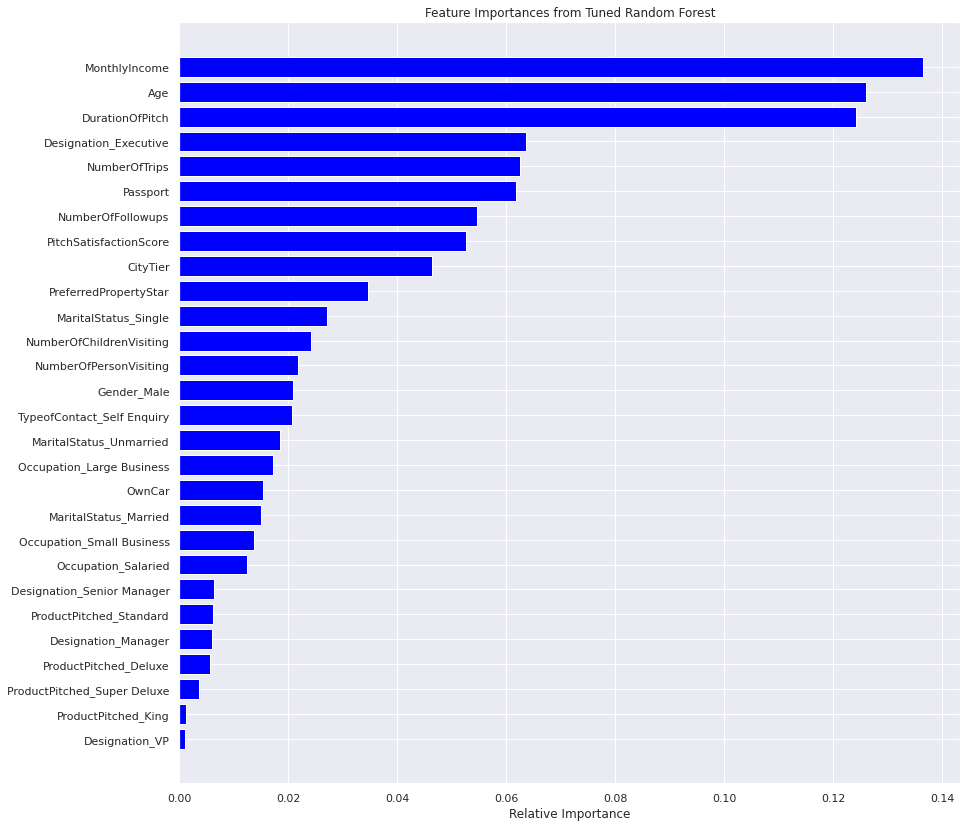

In [ ]:
feature_names=X_train.columns
importances=rf_tuned.feature_importances_
indices=np.argsort(importances)

## Plotting  Features 

plt.figure(figsize=(14,14))
plt.title('Feature Importances from Tuned Random Forest')
plt.barh(range(len(indices)),importances[indices],color='blue',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Insights and Recommandations